In [356]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import xlwings as xl
import plotly_express as pltexp
import openpyxl as pxl

In [380]:
wb=xl.Book('Book2.xlsx')

In [381]:
df=wb.sheets[0].range("A:B").expand().options(pd.DataFrame,index=False,header=0).value
df.head(10)

,0,1
0,3.563637,-3.127273
1,0.509091,-0.181818
2,-2.072727,2.727273
3,-6.690910,6.290910
4,-4.672728,4.727273
5,-6.945455,7.509092
6,-12.690910,12.872729
7,-11.000001,10.636365
8,-8.545455,8.109092
9,-6.418182,6.327273


In [382]:
df[2]=abs(df[0])
df[3]=abs(df[1])
df[4]=abs(df[2]-df[3])
df.head(10)

,0,1,2,3,4
0,3.563637,-3.127273,3.563637,3.127273,0.436364
1,0.509091,-0.181818,0.509091,0.181818,0.327273
2,-2.072727,2.727273,2.072727,2.727273,0.654546
3,-6.690910,6.290910,6.690910,6.290910,0.400000
4,-4.672728,4.727273,4.672728,4.727273,0.054545
5,-6.945455,7.509092,6.945455,7.509092,0.563636
6,-12.690910,12.872729,12.690910,12.872729,0.181818
7,-11.000001,10.636365,11.000001,10.636365,0.363636
8,-8.545455,8.109092,8.545455,8.109092,0.436364
9,-6.418182,6.327273,6.418182,6.327273,0.090909


In [383]:
df.iloc[:,2:5].values

array([[ 3.56363672,  3.12727304,  0.43636368],
       [ 0.50909096,  0.1818182 ,  0.32727276],
       [ 2.07272748,  2.727273  ,  0.65454552],
       ...,
       [ 0.        , 57.03636934, 57.03636934],
       [ 0.        , 56.41818746, 56.41818746],
       [ 0.        , 55.12727824, 55.12727824]])

In [384]:
wb.sheets[0].range("C:E").value=df.iloc[:,2:5].values

In [385]:
def regressionplot_generator(df,a,b,chartname):
    image_got=sns.regplot(data=df,x=a,y=b,scatter_kws={'color':'blue'},line_kws={'color':'red'})
    plt.title(chartname)
    fig=image_got.get_figure()
    wb.sheets[0].pictures.add(fig,name=chartname, update=True)
    image_got,fig=0,0

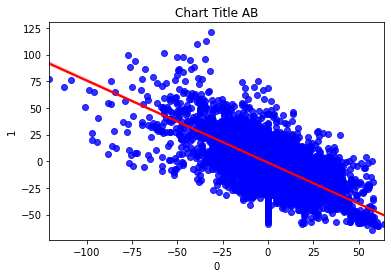

In [386]:
regressionplot_generator(df,a=df[0],b=df[1],chartname='Chart Title AB')

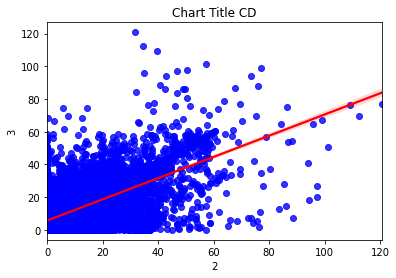

In [387]:

regressionplot_generator(df,a=df[2],b=df[3],chartname='Chart Title CD')

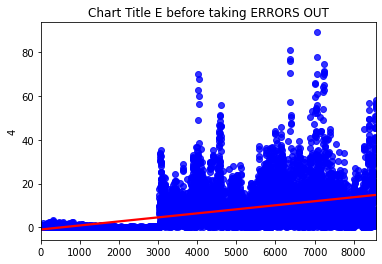

In [388]:

regressionplot_generator(df=df,a=df[4].index,b=df[4],chartname='Chart Title E before taking ERRORS OUT')

From the garph suddden rise at 3000 so check there

In [389]:
def lineplot_generator(df,x,y,chartname,colour):
    image_got=sns.lineplot(data=df,x=x,y=y,color=colour)
    plt.title(chartname)
    fig=image_got.get_figure()
    wb.sheets[0].pictures.add(fig,name=chartname, update=True)
    image_got,fig=0,0
    

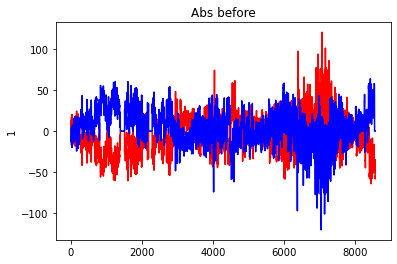

In [390]:
lineplot_generator(df=df,y=df[1],x=df[1].index,chartname='Abs before',colour='r')
lineplot_generator(df=df,y=df[0],x=df[0].index,chartname='Abs before',colour='b')

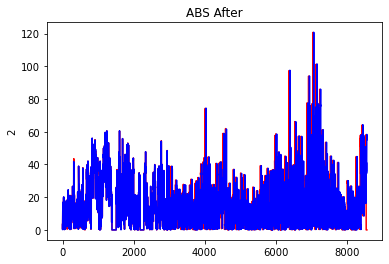

In [391]:
lineplot_generator(df=df,y=df[2],x=df[2].index,chartname='ABS After',colour='r')
lineplot_generator(df=df,y=df[3],x=df[3].index,chartname='ABS After',colour='b')

# AFTER ERROR

From the garph suddden rise at 3000 so check there

In [392]:
df_3000_above=df.iloc[3000:,:]
df_3000_above

,0,1,2,3,4
3000,-1.836364,1.727273,1.836364,1.727273,0.109091
3001,-6.490910,6.436364,6.490910,6.436364,0.054545
3002,-5.345455,5.345455,5.345455,5.345455,0.000000
3003,-2.654546,2.836364,2.654546,2.836364,0.181818
3004,-1.327273,1.290909,1.327273,1.290909,0.036364
...,...,...,...,...,...
8563,0.000000,-55.709096,0.000000,55.709096,55.709096
8564,0.000000,-58.381824,0.000000,58.381824,58.381824
8565,0.000000,-57.036369,0.000000,57.036369,57.036369
8566,0.000000,-56.418187,0.000000,56.418187,56.418187


In [393]:
df_3000_above[df_3000_above[2]-df_3000_above[3]>2]

,0,1,2,3,4
3024,-15.163638,-8.000001,15.163638,8.000001,7.163637
3025,-16.836365,-2.054546,16.836365,2.054546,14.781820
3026,-14.327274,-1.018182,14.327274,1.018182,13.309092
3027,-9.072728,-0.800000,9.072728,0.800000,8.272728
3028,-11.563638,-1.945455,11.563638,1.945455,9.618183
...,...,...,...,...,...
8539,55.581824,-43.272732,55.581824,43.272732,12.309092
8540,58.163642,-44.054550,58.163642,44.054550,14.109092
8541,56.854551,-43.072732,56.854551,43.072732,13.781820
8542,56.254551,-42.363641,56.254551,42.363641,13.890910


it is starting from coloumn 3024

In [394]:
df.iloc[3024:3050,:]

,0,1,2,3,4
3024,-15.163638,-8.000001,15.163638,8.000001,7.163637
3025,-16.836365,-2.054546,16.836365,2.054546,14.781820
3026,-14.327274,-1.018182,14.327274,1.018182,13.309092
3027,-9.072728,-0.800000,9.072728,0.800000,8.272728
3028,-11.563638,-1.945455,11.563638,1.945455,9.618183
3029,-19.872729,-2.545455,19.872729,2.545455,17.327274
3030,-11.290910,-1.690909,11.290910,1.690909,9.600001
3031,-1.727273,2.890909,1.727273,2.890909,1.163636
3032,4.400000,3.490909,4.400000,3.490909,0.909091
3033,-6.345455,0.309091,6.345455,0.309091,6.036364


In [395]:
df[5]=df[2]
df[6]=df[3]

In [400]:
df[6].iloc[3024:] = df[6].iloc[3024:].shift(-24)

In [401]:
df.iloc[3024:3050,:]

,0,1,2,3,4,5,6,7
3024,-15.163638,-8.000001,15.163638,15.145456,7.163637,15.163638,15.145456,7.163637
3025,-16.836365,-2.054546,16.836365,16.800002,14.781820,16.836365,16.800002,14.781820
3026,-14.327274,-1.018182,14.327274,14.472729,13.309092,14.327274,14.472729,13.309092
3027,-9.072728,-0.800000,9.072728,9.163637,8.272728,9.072728,9.163637,8.272728
3028,-11.563638,-1.945455,11.563638,11.418183,9.618183,11.563638,11.418183,9.618183
3029,-19.872729,-2.545455,19.872729,19.727275,17.327274,19.872729,19.727275,17.327274
3030,-11.290910,-1.690909,11.290910,11.636365,9.600001,11.290910,11.636365,9.600001
3031,-1.727273,2.890909,1.727273,1.800000,1.163636,1.727273,1.800000,1.163636
3032,4.400000,3.490909,4.400000,4.309091,0.909091,4.400000,4.309091,0.909091
3033,-6.345455,0.309091,6.345455,6.163637,6.036364,6.345455,6.163637,6.036364


In [402]:
df[7]=abs(df[5]-df[6])

In [403]:
df.iloc[3024:3050,:]

,0,1,2,3,4,5,6,7
3024,-15.163638,-8.000001,15.163638,15.145456,7.163637,15.163638,15.145456,0.018182
3025,-16.836365,-2.054546,16.836365,16.800002,14.781820,16.836365,16.800002,0.036364
3026,-14.327274,-1.018182,14.327274,14.472729,13.309092,14.327274,14.472729,0.145455
3027,-9.072728,-0.800000,9.072728,9.163637,8.272728,9.072728,9.163637,0.090909
3028,-11.563638,-1.945455,11.563638,11.418183,9.618183,11.563638,11.418183,0.145455
3029,-19.872729,-2.545455,19.872729,19.727275,17.327274,19.872729,19.727275,0.145455
3030,-11.290910,-1.690909,11.290910,11.636365,9.600001,11.290910,11.636365,0.345455
3031,-1.727273,2.890909,1.727273,1.800000,1.163636,1.727273,1.800000,0.072727
3032,4.400000,3.490909,4.400000,4.309091,0.909091,4.400000,4.309091,0.090909
3033,-6.345455,0.309091,6.345455,6.163637,6.036364,6.345455,6.163637,0.181818


In [404]:
wb.sheets[0].range("F:G").value=df.iloc[:,5:8].values

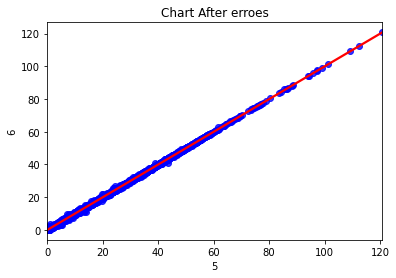

In [405]:
regressionplot_generator(df,a=df[5],b=df[6],chartname='Chart After erroes')

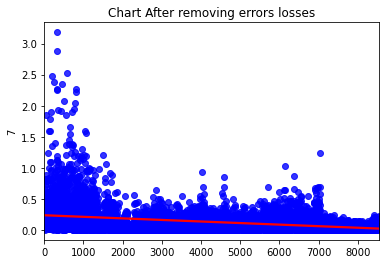

In [406]:
regressionplot_generator(df=df,a=df[7].index,b=df[7],chartname='Chart After removing errors losses')

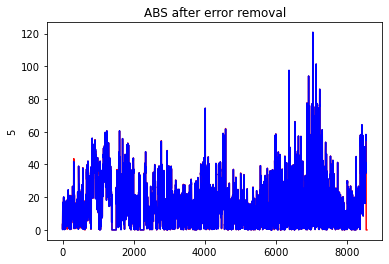

In [407]:
lineplot_generator(df=df,y=df[5],x=df[5].index,chartname='ABS after error removal',colour='r')
lineplot_generator(df=df,y=df[6],x=df[6].index,chartname='ABS after error removal',colour='b')

# END